In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
data = pd.read_csv('car_evaluation.csv', 
                   names=['buying','maint','doors','lug_boot','safety','class'])

data.head()

,buying,maint,doors,lug_boot,safety,class
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc


In [4]:
data['class'], class_names = pd.factorize(data['class'])
for col in ['buying','maint','doors','lug_boot','safety']:
    data[col], _ = pd.factorize(data[col])


data.head()


,buying,maint,doors,lug_boot,safety,class
vhigh,0,0,0,0,0,0
vhigh,0,0,0,0,1,0
vhigh,0,0,0,0,2,0
vhigh,0,0,0,1,0,0
vhigh,0,0,0,1,1,0


In [5]:
#Select the predictor feature and select the target variable

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=0)

In [7]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Misclassified samples:", (y_test != y_pred).sum())
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Misclassified samples: 127
Accuracy: 0.7552986512524085


In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns) \
                   .sort_values(ascending=False)


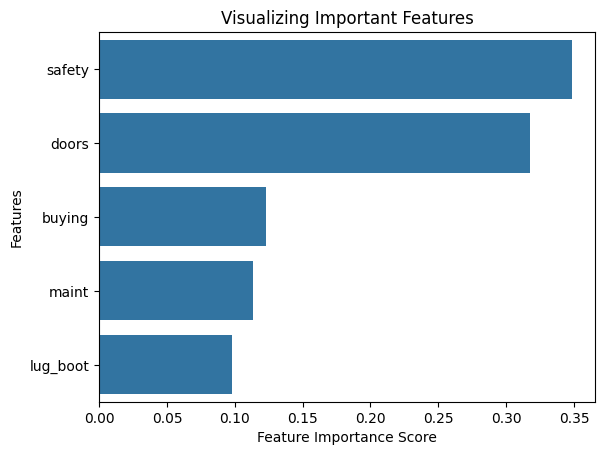

In [9]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


In [10]:
best_idx = np.argmax(clf.feature_importances_)
best_name = X_train.columns[best_idx]
print(f"The best feature is: {best_name}")



The best feature is: safety


In [11]:
# Train a single-tree forest using only the best feature
one_feat = X_train.iloc[:, best_idx].values.reshape(-1, 1)
single_tree_forest = RandomForestClassifier(n_estimators=1, random_state=0)
single_tree_forest.fit(one_feat, y_train)



,n_estimators,1
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# Export and visualize tree using Graphviz
dot_data = export_graphviz(
    single_tree_forest.estimators_[0],
    out_file=None,
    feature_names=[best_name],
    class_names=list(class_names),
    filled=True, rounded=True, special_characters=True
)


In [13]:
graph = graphviz.Source(dot_data)
graph.render("best_feature_tree")  # saves as PDF
graph.view("best_feature_tree")

'best_feature_tree.pdf'